# Clustering Crypto

In [91]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [92]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [93]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [94]:
# Alternatively, use the provided csv file:
from pathlib import Path

file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame

df = pd.read_csv(file_path, index_col="Unnamed: 0")


### Data Preprocessing

In [95]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'

df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [96]:
# Keep only cryptocurrencies that are trading
#select_color = df.loc[df['Color'] == 'Green']

df1= df.loc[df["IsTrading"] == True]
df1

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [97]:
# Keep only cryptocurrencies with a working algorithm

df2= df1.loc[df["Algorithm"] != "N/A"]
df2

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [98]:
# Remove the "IsTrading" column
df2.drop(columns=["IsTrading"], inplace = True)
df2

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [100]:
# Remove rows with at least 1 null value
df2= df2.dropna(axis=0, how="any")
df2

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [101]:
# Remove rows with cryptocurrencies having no coins mined
df3= df2.loc[df["TotalCoinsMined"] > 0 ]
df3

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [102]:
# Drop rows where there are 'N/A' text values
df3.dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [103]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
CoinName_df = pd.DataFrame(df3["CoinName"], index=df3.index)
CoinName_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [104]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
df4=df3.drop(columns=["CoinName"], axis=1)
df4

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [106]:
# Create dummy variables for text features

X = pd.get_dummies(df4, columns=["Algorithm","ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Standardize data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [108]:
scaled_data = scaler.transform(X)

In [109]:
features_scaled_data = pd.DataFrame(scaled_data, columns=X.iloc[:, :101].columns)
features_scaled_data.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


### Reducing Dimensions Using PCA

In [110]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)

In [111]:
# Create a DataFrame with the principal components data
crypto_pca = pca.fit_transform(features_scaled_data)

In [116]:
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=df4.index)

df_crypto_pca.head()

,PC1,PC2,PC3
42,-0.329169,1.035386,-0.586413
404,-0.312486,1.035688,-0.586851
1337,2.302497,1.745420,-0.694938
BTC,-0.146863,-1.330932,0.201054
ETH,-0.151698,-2.039819,0.402448


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='k'>

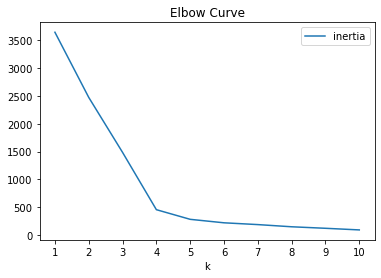

In [117]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

Running K-Means with `k=<your best value for k here>`

In [122]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(df_crypto_pca)
# Predict clusters
predictions = model.predict(df_crypto_pca)
# Create a new DataFrame including predicted clusters and cryptocurrencies features

cluster_df = pd.concat([df4, df_crypto_pca], axis=1)
cluster_df["CoinName"] = CoinName_df["CoinName"]
cluster_df["class"] = model.labels_
cluster_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,class,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.329169,1.035386,-0.586413,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.312486,1.035688,-0.586851,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302497,1.745420,-0.694938,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.146863,-1.330932,0.201054,1,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-0.151698,-2.039819,0.402448,1,Ethereum


### Visualizing Results

#### 3D-Scatter with Clusters

In [134]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    cluster_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="class",
    symbol="class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [136]:
# Table with tradable cryptos
#X.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"], sortable=True, selectable=True)


cluster_df[["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"]].hvplot.table()

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [139]:
# Print the total number of tradable cryptocurrencies

print(f"The total number of tradeable cryptocurrencies is {len(cluster_df)}.")

The total number of tradeable cryptocurrencies is 532.


#### Scatter Plot with Tradable Cryptocurrencies

In [141]:
# Scale data to create the scatter plot
mm_scal = MinMaxScaler()
plot_data = mm_scal.fit_transform(cluster_df[['TotalCoinsMined','TotalCoinSupply']])

plot_df = pd.DataFrame(plot_data, columns=['TotalCoinsMined','TotalCoinSupply'], index=cluster_df.index)
plot_df['CoinName'] = cluster_df['CoinName']
plot_df['class'] = cluster_df['class']

plot_df.head(5)

,TotalCoinsMined,TotalCoinSupply,CoinName,class
42,0.000000,4.200000e-11,42 Coin,0
404,0.001066,5.320000e-04,404Coin,0
1337,0.029576,3.141593e-01,EliteCoin,0
BTC,0.000018,2.100000e-05,Bitcoin,1
ETH,0.000109,0.000000e+00,Ethereum,1


In [151]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"


In [149]:
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", hover_color=['CoinName'], by="class")

:NdOverlay   [class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)